In [1]:
import pandas as pd
from pickle import load
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

## GROUP1,2 MODE resample

In [75]:
GROUP2_MODE = pd.read_csv('MODEL_DATA/GROUP2_MODE.csv')
# 타임스탬프 변환 및 인덱스 설정
GROUP2_MODE['Timestamp'] = pd.to_datetime(GROUP2_MODE['Timestamp'])  # 타임스탬프 변환
GROUP2_MODE.set_index('Timestamp', inplace=True)  # 인덱스 설정
GROUP2_MODE.sort_index(inplace=True)  # 인덱스 정렬

# 각 열에 대해 리샘플링
resampled_data = {}
for col in GROUP2_MODE.columns:
    resampled_data[col] = GROUP2_MODE[col].resample('5S').ffill().dropna()  # 리샘플링

# 리샘플링 결과를 데이터프레임으로 합치기
GROUP2_MODE = pd.DataFrame(resampled_data)

C:\Users\jhpark\AppData\Local\Temp\ipykernel_16396\1666217456.py:10: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  resampled_data[col] = GROUP2_MODE[col].resample('5S').ffill().dropna()  # 리샘플링


In [73]:
GROUP1_MODE = pd.read_csv('MODEL_DATA/GROUP1_MODE.csv')
# 타임스탬프 변환 및 인덱스 설정
GROUP1_MODE['Timestamp'] = pd.to_datetime(GROUP1_MODE['Timestamp'])  # 타임스탬프 변환
GROUP1_MODE.set_index('Timestamp', inplace=True)  # 인덱스 설정
GROUP1_MODE.sort_index(inplace=True)  # 인덱스 정렬

# 각 열에 대해 리샘플링
resampled_data = {}
for col in GROUP1_MODE.columns:
    resampled_data[col] = GROUP1_MODE[col].resample('5S').ffill().dropna()  # 리샘플링

# 리샘플링 결과를 데이터프레임으로 합치기
GROUP1_MODE = pd.DataFrame(resampled_data)

C:\Users\jhpark\AppData\Local\Temp\ipykernel_16396\1295183826.py:10: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  resampled_data[col] = GROUP1_MODE[col].resample('5S').ffill().dropna()  # 리샘플링


## 학습구간 설정

In [76]:
start = '2024-08-06 12:30:00'
end = '2024-08-06 13:30:00'

## CWP_PRESS

In [105]:
# 경로 설정
folder_path = 'MODEL_DATA/GROUP1_CWP_PRESS(test_sample_data)/'

# 폴더 내 CSV 파일 리스트 가져오기
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 전체 파일 경로 생성
file_paths = [folder_path + file_name for file_name in csv_files]


# 데이터프레임을 저장할 리스트
dataframes = []

# CSV 파일 읽기 및 전처리
for file_path in file_paths:
    df = pd.read_csv(file_path).iloc[:,:-2]
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])  # 타임스탬프 변환
    df.set_index('Timestamp', inplace=True)  # 인덱스 설정
    df.sort_index(inplace=True)
    df.dropna(inplace=True)
    if df.index.duplicated().any():
        df = df[~df.index.duplicated(keep='first')]  # 중복된 타임스탬프 중 첫 번째만 남김

    df_resampled = df.resample('5S').ffill().dropna()  # 리샘플링 및 결측값 처리
    dataframes.append(df_resampled)  # 전처리된 데이터프레임 추가

# 모든 데이터프레임 합치기
combined_df_CWP = pd.concat(dataframes,axis=1).iloc[:-1,:]
combined_df_CWP.columns = ['3370-01-AI098','3370-01-AI099','3370-01-AI201','3370-01-AI202','3370-01-AI202-1','3370-01-EA5G5','3370-01-G-MODE','3370-01-P-MODE']
combined_df_CWP

C:\Users\jhpark\AppData\Local\Temp\ipykernel_16396\1321441469.py:24: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df.resample('5S').ffill().dropna()  # 리샘플링 및 결측값 처리
C:\Users\jhpark\AppData\Local\Temp\ipykernel_16396\1321441469.py:24: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df.resample('5S').ffill().dropna()  # 리샘플링 및 결측값 처리
C:\Users\jhpark\AppData\Local\Temp\ipykernel_16396\1321441469.py:24: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df.resample('5S').ffill().dropna()  # 리샘플링 및 결측값 처리
C:\Users\jhpark\AppData\Local\Temp\ipykernel_16396\1321441469.py:24: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df.resample('5S').ffill().dropna()  # 리샘플링 및 결측값 처리
C:\Users\jhpark\AppData\Local\Temp\ipykernel_16396\13214

,3370-01-AI098,3370-01-AI099,3370-01-AI201,3370-01-AI202,3370-01-AI202-1,3370-01-EA5G5,3370-01-G-MODE,3370-01-P-MODE
Timestamp,,,,,,,,
2024-01-05 06:00:00,0.005,-0.003,9.236,7.211,9.020,0.000,0.0,1
2024-01-05 06:00:05,0.005,-0.003,9.236,7.211,9.020,0.000,0.0,1
2024-01-05 06:00:10,0.005,-0.003,9.238,7.211,9.020,0.000,0.0,1
2024-01-05 06:00:15,0.005,-0.002,9.238,7.211,9.023,0.000,0.0,1
2024-01-05 06:00:20,0.005,-0.002,9.238,7.211,9.023,0.000,0.0,1
...,...,...,...,...,...,...,...,...
2024-01-05 10:29:35,0.136,0.110,8.896,6.578,13.055,4.162,0.0,1
2024-01-05 10:29:40,0.136,0.110,8.896,6.578,13.055,4.162,0.0,1
2024-01-05 10:29:45,0.140,0.113,8.868,6.578,13.020,4.150,0.0,1


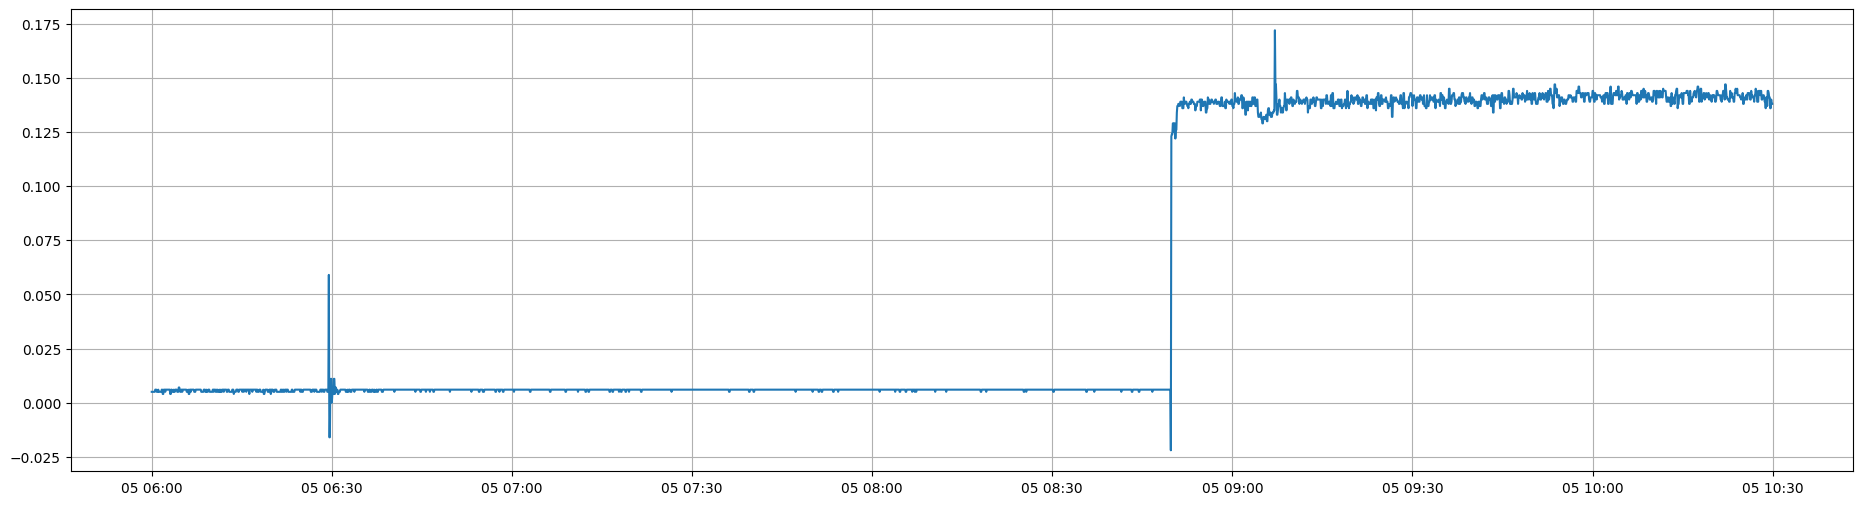

In [106]:
plt.figure(figsize=(23,6))
plt.plot(combined_df_CWP['3370-01-AI098'])
plt.grid()
plt.show()

In [107]:
combined_df_CWP = combined_df_CWP.loc['2024-01-05 08:26:55': '2024-01-05 09:26:54']
new_start_time = '2024-08-06 12:30:00'
new_end_time = '2024-08-06 13:29:55'
new_time_index = pd.date_range(start=new_start_time, periods=len(combined_df_CWP), freq='5S')
combined_df_CWP.index = new_time_index
combined_df_CWP['Timestamp'] = pd.to_datetime(combined_df_CWP.index) 
combined_df_CWP.set_index('Timestamp', inplace=True)  # 인덱스 설정
combined_df_CWP.sort_index(inplace=True)  # 인덱스 정렬
combined_df_CWP

C:\Users\jhpark\AppData\Local\Temp\ipykernel_16396\3581697304.py:4: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  new_time_index = pd.date_range(start=new_start_time, periods=len(combined_df_CWP), freq='5S')
C:\Users\jhpark\AppData\Local\Temp\ipykernel_16396\3581697304.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df_CWP['Timestamp'] = pd.to_datetime(combined_df_CWP.index)


,3370-01-AI098,3370-01-AI099,3370-01-AI201,3370-01-AI202,3370-01-AI202-1,3370-01-EA5G5,3370-01-G-MODE,3370-01-P-MODE
Timestamp,,,,,,,,
2024-08-06 12:30:00,0.006,-0.003,9.249,9.004,9.017,0.000,0.0,1
2024-08-06 12:30:05,0.006,-0.003,9.249,9.004,9.017,0.000,0.0,1
2024-08-06 12:30:10,0.006,-0.003,9.249,9.004,9.017,0.000,0.0,1
2024-08-06 12:30:15,0.006,-0.003,9.249,9.004,9.017,0.000,0.0,1
2024-08-06 12:30:20,0.006,-0.003,9.249,9.004,9.017,0.000,0.0,1
...,...,...,...,...,...,...,...,...
2024-08-06 13:29:35,0.142,0.114,8.962,6.586,13.121,4.156,0.0,1
2024-08-06 13:29:40,0.132,0.113,8.945,6.586,13.099,4.160,0.0,1
2024-08-06 13:29:45,0.132,0.113,8.945,6.586,13.099,4.160,0.0,1


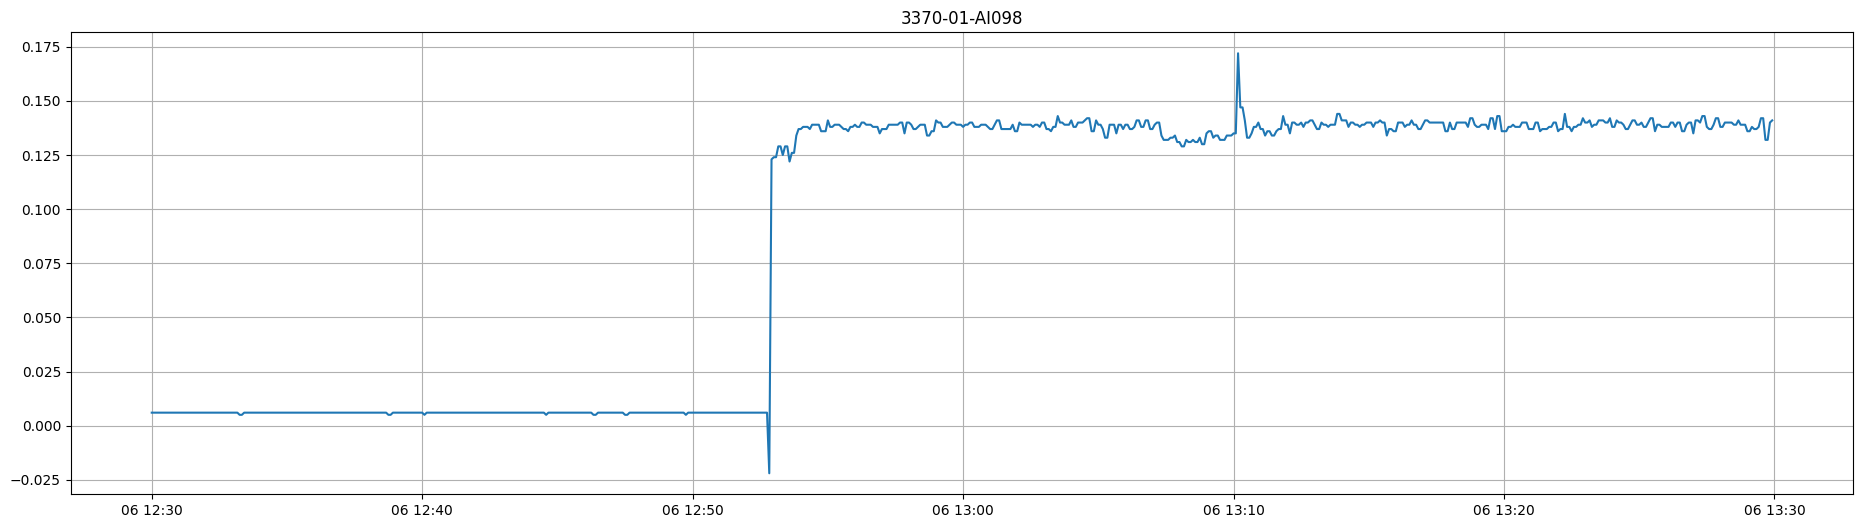

In [108]:
plt.figure(figsize=(23,6))
plt.plot(combined_df_CWP['3370-01-AI098'])
plt.title('3370-01-AI098')
plt.grid()
plt.show()

## GROUP1_SS_PRESS1

In [83]:
# CSV 파일 읽기
data = pd.read_csv('MODEL_DATA/GROUP1_SS_PRESS1/GROUP1_SS_PRESS1.csv')

# 타임스탬프 변환 및 인덱스 설정
data['Timestamp'] = pd.to_datetime(data['Timestamp'])  # 타임스탬프 변환
data.set_index('Timestamp', inplace=True)  # 인덱스 설정
data.sort_index(inplace=True)  # 인덱스 정렬

# 각 열에 대해 리샘플링
resampled_data = {}
for col in data.columns:
    resampled_data[col] = data[col].resample('5S').ffill().dropna()  # 리샘플링

# 리샘플링 결과를 데이터프레임으로 합치기
combined_resampled_df = pd.DataFrame(resampled_data)
combined_resampled_df = pd.concat([combined_resampled_df, GROUP1_MODE], axis=1).loc[start:end].iloc[:-1,:]
combined_resampled_df

C:\Users\jhpark\AppData\Local\Temp\ipykernel_16396\1695392975.py:12: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  resampled_data[col] = data[col].resample('5S').ffill().dropna()  # 리샘플링


,3370-01-AI035,3370-01-AI036,3370-01-AI037,3370-01-AI145,3370-01-G-MODE,3370-01-P-MODE
Timestamp,,,,,,
2024-08-06 12:30:00,0.642,0.668,0.688,7.749,1,1
2024-08-06 12:30:05,0.642,0.668,0.688,7.749,1,1
2024-08-06 12:30:10,0.642,0.668,0.688,7.749,1,1
2024-08-06 12:30:15,0.642,0.668,0.688,7.749,1,1
2024-08-06 12:30:20,0.642,0.668,0.688,7.749,1,1
...,...,...,...,...,...,...
2024-08-06 13:29:35,0.601,0.649,0.704,7.766,1,1
2024-08-06 13:29:40,0.601,0.649,0.704,7.766,1,1
2024-08-06 13:29:45,0.601,0.649,0.704,7.766,1,1


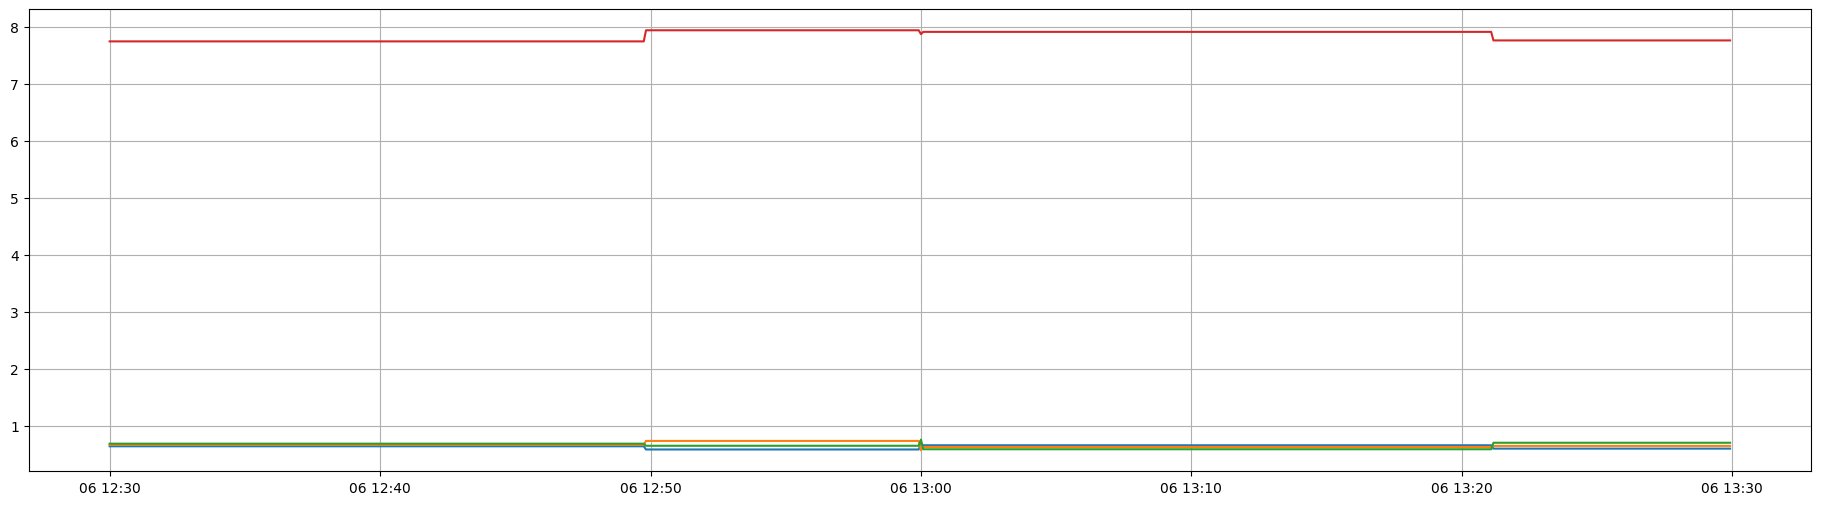

In [84]:
plt.figure(figsize=(23,6))
plt.plot(combined_resampled_df.iloc[:,:-2])
plt.grid()
plt.show()

## GROUP1_TEMP_CONCAT

In [85]:
# CSV 파일 읽기
data = pd.read_csv('MODEL_DATA\GROUP1_TEMP_CONCAT/GROUP1_TEMP_CONCAT.csv').iloc[:-1,:]

# 타임스탬프 변환 및 인덱스 설정
data['Timestamp'] = pd.to_datetime(data['Timestamp'])  # 타임스탬프 변환
data.set_index('Timestamp', inplace=True)  # 인덱스 설정
data.sort_index(inplace=True)  # 인덱스 정렬

# 각 열에 대해 리샘플링
resampled_data = {}
for col in data.columns:
    resampled_data[col] = data[col].resample('5S').ffill().dropna()  # 리샘플링

# 리샘플링 결과를 데이터프레임으로 합치기
combined_resampled_df = pd.DataFrame(resampled_data)
combined_resampled_df = pd.concat([combined_resampled_df, GROUP1_MODE], axis=1).loc[start:end].iloc[:-1,:]
combined_resampled_df.to_csv('VAE_GROUP1_TEMP_CONCAT.csv')

C:\Users\jhpark\AppData\Local\Temp\ipykernel_16396\3383754971.py:12: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  resampled_data[col] = data[col].resample('5S').ffill().dropna()  # 리샘플링


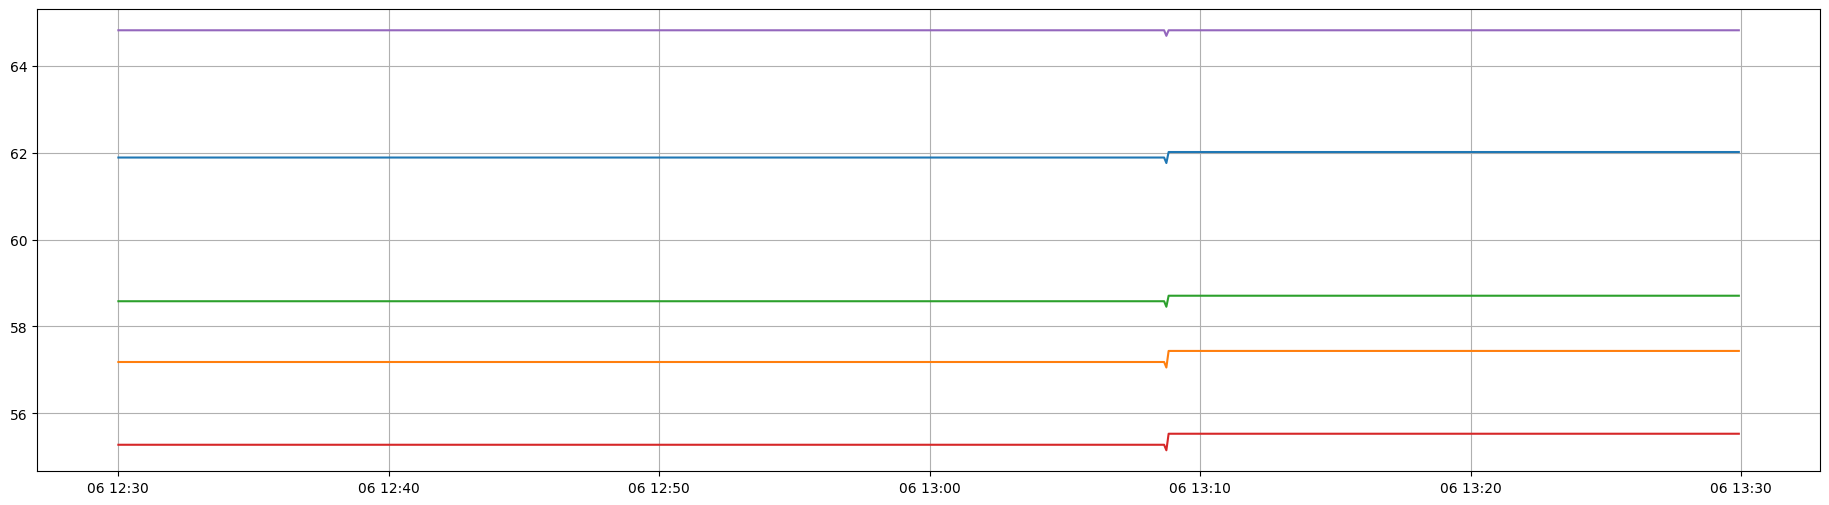

In [86]:
plt.figure(figsize=(23,6))
plt.plot(combined_resampled_df.iloc[:,:-2])
plt.grid()
plt.show()

## GROUP1_TURBINE_BEARING2

In [ ]:
# CSV 파일 읽기
data = pd.read_csv('MODEL_DATA/GROUP1_TURBINE_BEARING2/GROUP1_TURBINE_BEARING2.csv')

# 타임스탬프 변환 및 인덱스 설정
data['Timestamp'] = pd.to_datetime(data['Timestamp'])  # 타임스탬프 변환
data.set_index('Timestamp', inplace=True)  # 인덱스 설정
data.sort_index(inplace=True)  # 인덱스 정렬

# 각 열에 대해 리샘플링
resampled_data = {}
for col in data.columns:
    resampled_data[col] = data[col].resample('5S').ffill().dropna()  # 리샘플링

# 리샘플링 결과를 데이터프레임으로 합치기
combined_resampled_df = pd.DataFrame(resampled_data)
combined_resampled_df = pd.concat([combined_resampled_df, GROUP1_MODE], axis=1).loc[start:end].iloc[:-1,:]

C:\Users\jhpark\AppData\Local\Temp\ipykernel_16396\2456106048.py:12: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  resampled_data[col] = data[col].resample('5S').ffill().dropna()  # 리샘플링


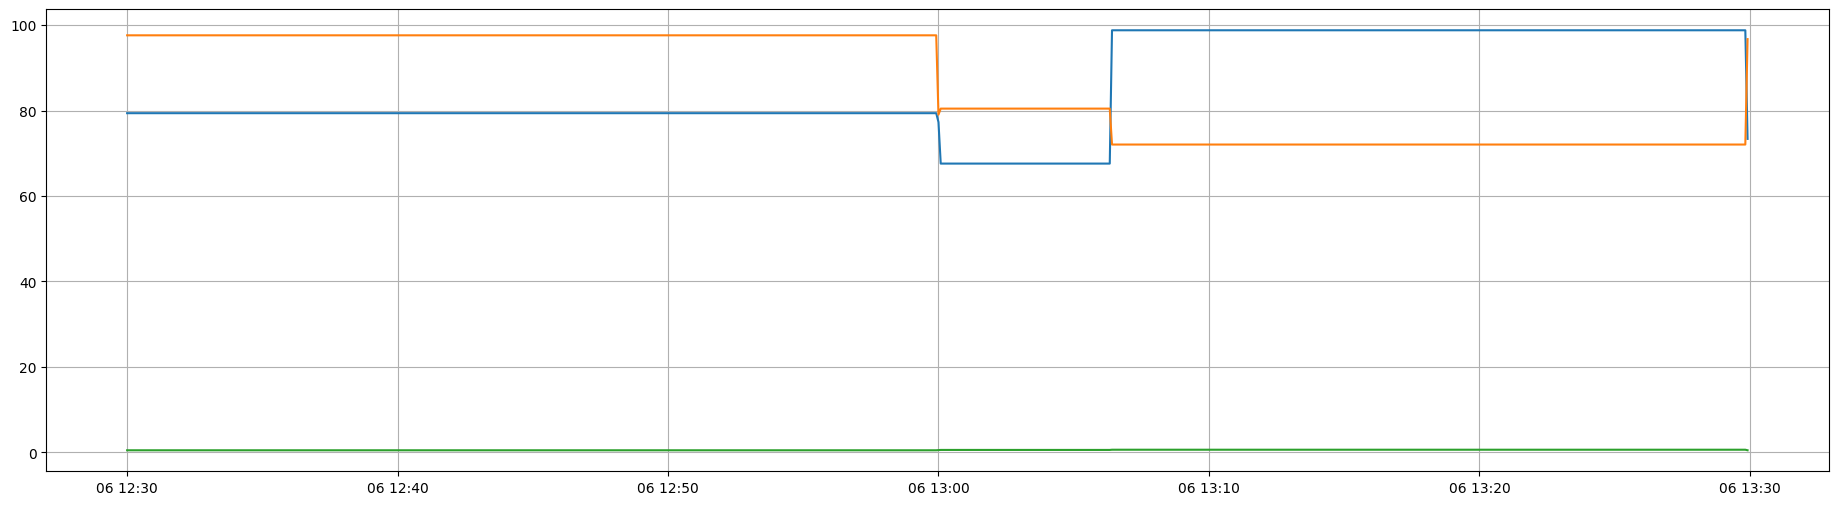

In [88]:
plt.figure(figsize=(23,6))
plt.plot(combined_resampled_df.iloc[:,:-2])
plt.grid()
plt.show()

## GROUP1_TURBINE_OIL

In [ ]:
# CSV 파일 읽기
data = pd.read_csv('MODEL_DATA/GROUP1_TURBINE_OIL/GROUP1_TURBINE_OIL.csv')

# 타임스탬프 변환 및 인덱스 설정
data['Timestamp'] = pd.to_datetime(data['Timestamp'])  # 타임스탬프 변환
data.set_index('Timestamp', inplace=True)  # 인덱스 설정
data.sort_index(inplace=True)  # 인덱스 정렬

# 각 열에 대해 리샘플링
resampled_data = {}
for col in data.columns:
    resampled_data[col] = data[col].resample('5S').ffill().dropna()  # 리샘플링

# 리샘플링 결과를 데이터프레임으로 합치기
combined_resampled_df = pd.DataFrame(resampled_data)
combined_resampled_df = pd.concat([combined_resampled_df, GROUP1_MODE], axis=1).loc[start:end].iloc[:-1,:]

C:\Users\jhpark\AppData\Local\Temp\ipykernel_16396\3542337499.py:12: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  resampled_data[col] = data[col].resample('5S').ffill().dropna()  # 리샘플링


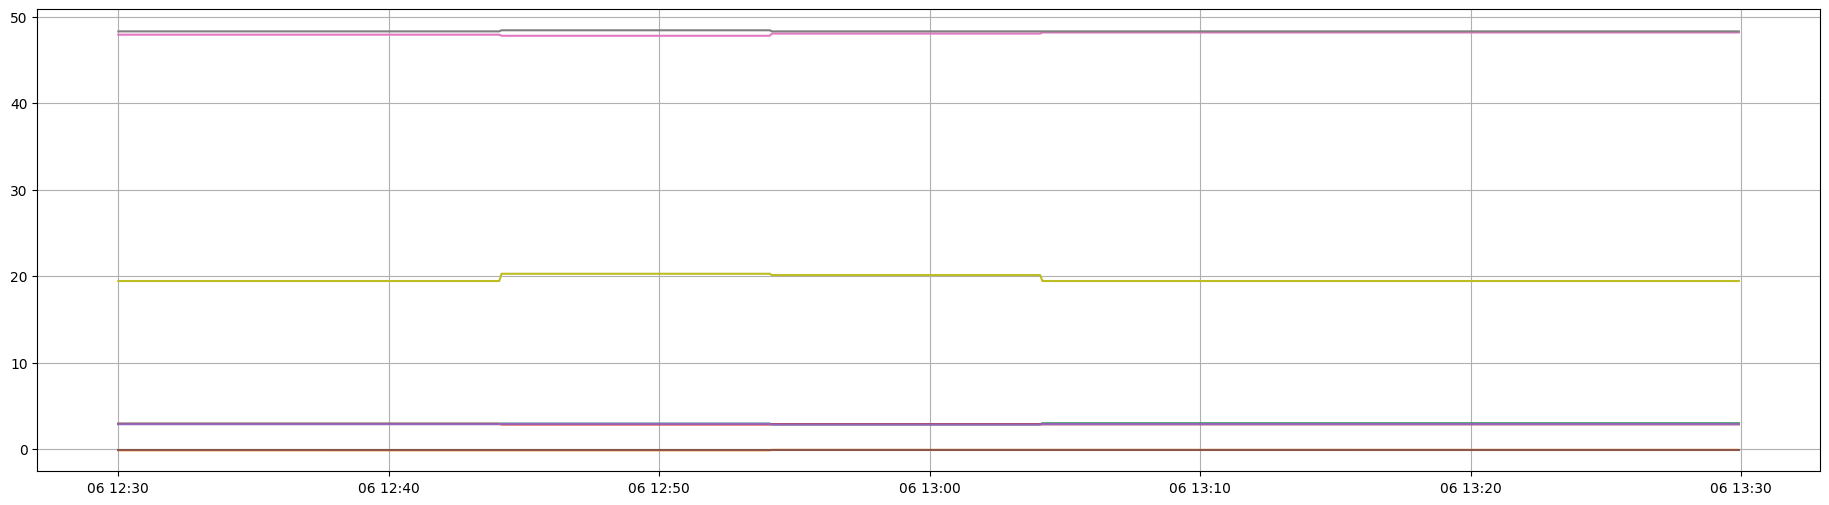

In [90]:
plt.figure(figsize=(23,6))
plt.plot(combined_resampled_df.iloc[:,:-2])
plt.grid()
plt.show()

## GROUP1_TURBINE_PRESS2

In [91]:
# CSV 파일 읽기
data = pd.read_csv('MODEL_DATA/GROUP1_TURBINE_PRESS2/GROUP1_TURBINE_PRESS2.csv')

# 타임스탬프 변환 및 인덱스 설정
data['Timestamp'] = pd.to_datetime(data['Timestamp'])  # 타임스탬프 변환
data.set_index('Timestamp', inplace=True)  # 인덱스 설정
data.sort_index(inplace=True)  # 인덱스 정렬

# 각 열에 대해 리샘플링
resampled_data = {}
for col in data.columns:
    resampled_data[col] = data[col].resample('5S').ffill().dropna()  # 리샘플링

# 리샘플링 결과를 데이터프레임으로 합치기
combined_resampled_df = pd.DataFrame(resampled_data)
combined_resampled_df = pd.concat([combined_resampled_df, GROUP1_MODE], axis=1).loc[start:end].iloc[:-1,:]

C:\Users\jhpark\AppData\Local\Temp\ipykernel_16396\3252023462.py:12: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  resampled_data[col] = data[col].resample('5S').ffill().dropna()  # 리샘플링


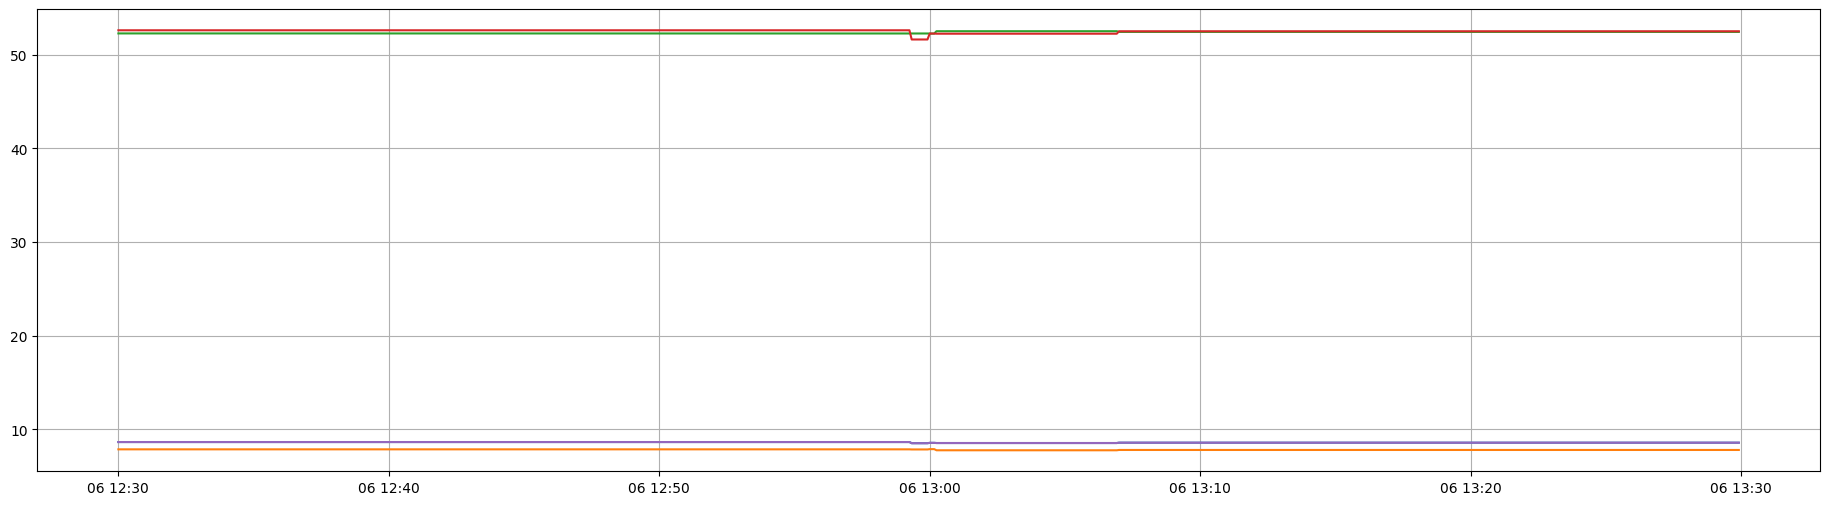

In [92]:
plt.figure(figsize=(23,6))
plt.plot(combined_resampled_df.iloc[:,:-2])
plt.grid()
plt.show()

## GROUP2_SS_PRESS1

In [94]:
# CSV 파일 읽기
data = pd.read_csv('MODEL_DATA/GROUP2_SS_PRESS1/GROUP2_SS_PRESS1.csv').iloc[:-1,:]

# 타임스탬프 변환 및 인덱스 설정
data['Timestamp'] = pd.to_datetime(data['Timestamp'])  # 타임스탬프 변환
data.set_index('Timestamp', inplace=True)  # 인덱스 설정
data.sort_index(inplace=True)  # 인덱스 정렬

# 각 열에 대해 리샘플링
resampled_data = {}
for col in data.columns:
    resampled_data[col] = data[col].resample('5S').ffill().dropna()  # 리샘플링

# 리샘플링 결과를 데이터프레임으로 합치기
combined_resampled_df = pd.DataFrame(resampled_data)
combined_resampled_df = pd.concat([combined_resampled_df, GROUP1_MODE], axis=1).loc[start:end].iloc[:-1,:]

C:\Users\jhpark\AppData\Local\Temp\ipykernel_16396\3258570453.py:12: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  resampled_data[col] = data[col].resample('5S').ffill().dropna()  # 리샘플링


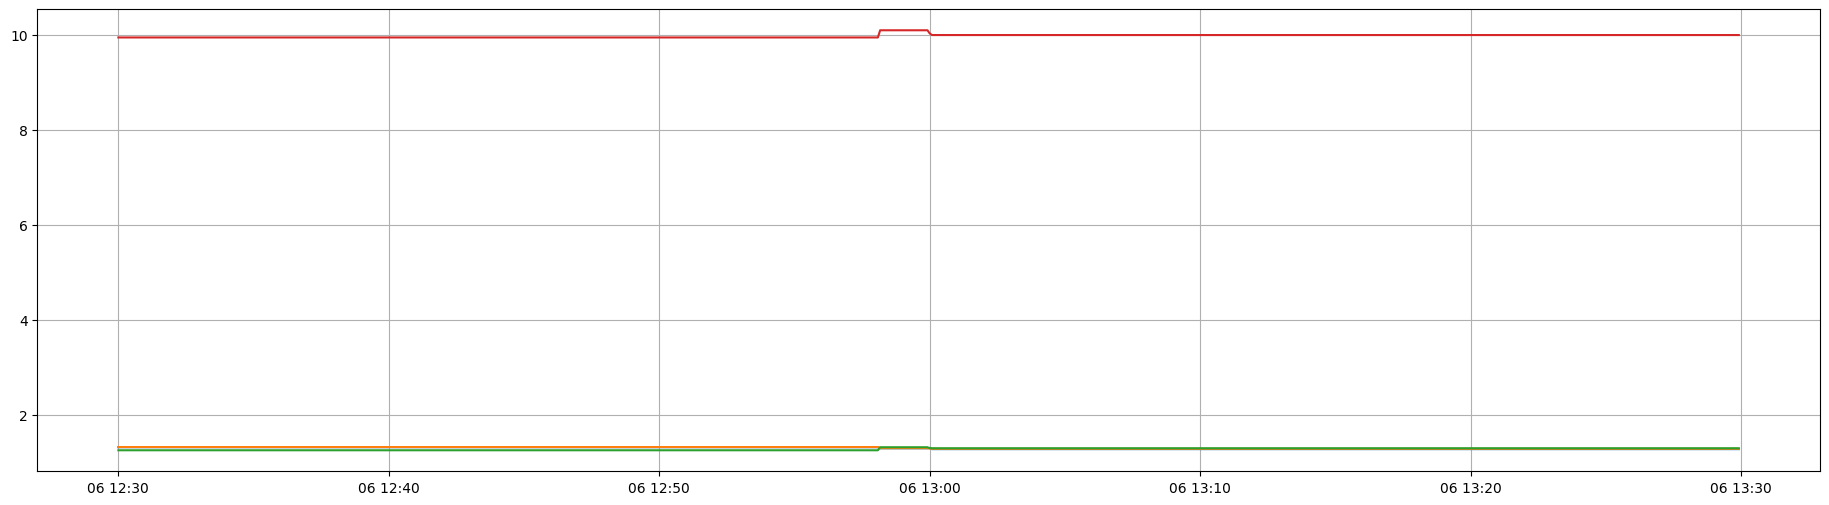

In [95]:
plt.figure(figsize=(23,6))
plt.plot(combined_resampled_df.iloc[:,:-2])
plt.grid()
plt.show()

## GROUP2_SS_TEMP

In [96]:
# CSV 파일 읽기
data = pd.read_csv('MODEL_DATA/GROUP2_SS_TEMP/GROUP2_SS_TEMP.csv')

# 타임스탬프 변환 및 인덱스 설정
data['Timestamp'] = pd.to_datetime(data['Timestamp'])  # 타임스탬프 변환
data.set_index('Timestamp', inplace=True)  # 인덱스 설정
data.sort_index(inplace=True)  # 인덱스 정렬

# 각 열에 대해 리샘플링
resampled_data = {}
for col in data.columns:
    resampled_data[col] = data[col].resample('5S').ffill().dropna()  # 리샘플링

# 리샘플링 결과를 데이터프레임으로 합치기
combined_resampled_df = pd.DataFrame(resampled_data)
combined_resampled_df = pd.concat([combined_resampled_df, GROUP1_MODE], axis=1).loc[start:end].iloc[:-1,:]

C:\Users\jhpark\AppData\Local\Temp\ipykernel_16396\1512722916.py:12: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  resampled_data[col] = data[col].resample('5S').ffill().dropna()  # 리샘플링


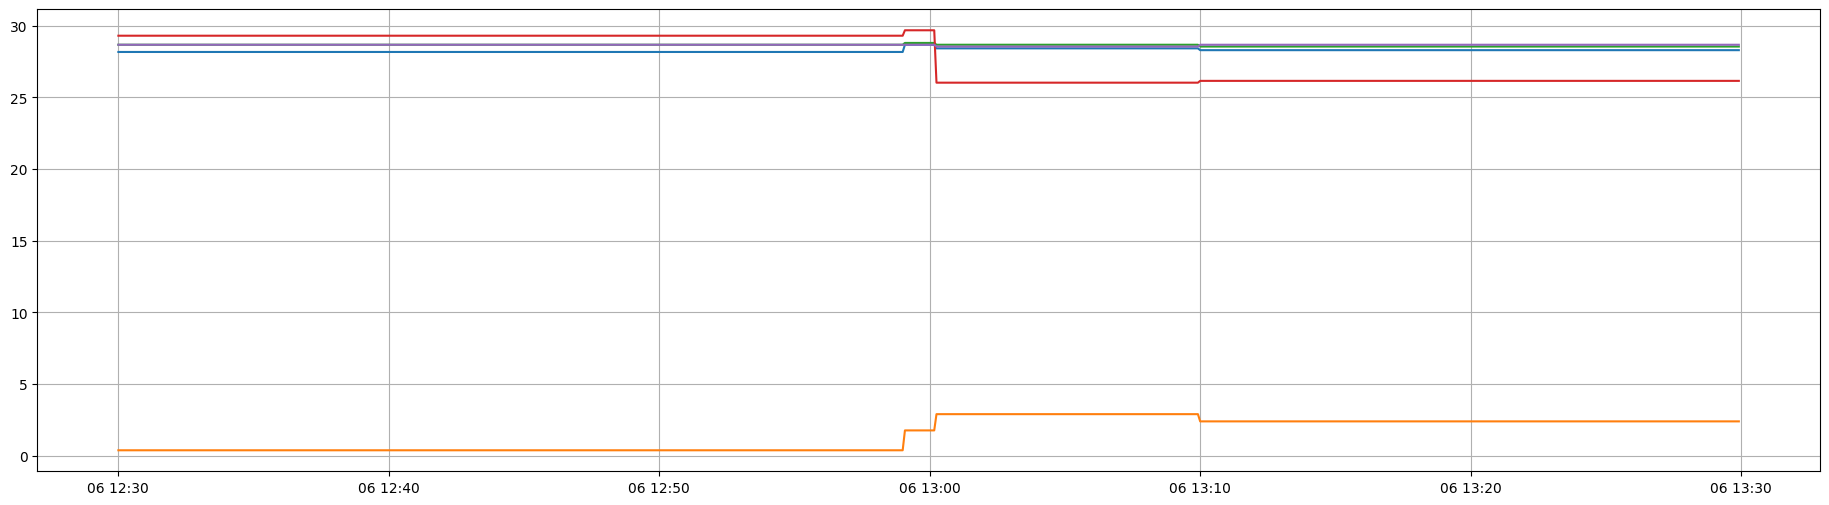

In [97]:
plt.figure(figsize=(23,6))
plt.plot(combined_resampled_df.iloc[:,:-2])
plt.grid()
plt.show()

## GROUP2_TURBINE_OIL

In [98]:
# CSV 파일 읽기
data = pd.read_csv('MODEL_DATA/GROUP2_TURBINE_OIL/GROUP2_TURBINE_OIL.csv')

# 타임스탬프 변환 및 인덱스 설정
data['Timestamp'] = pd.to_datetime(data['Timestamp'])  # 타임스탬프 변환
data.set_index('Timestamp', inplace=True)  # 인덱스 설정
data.sort_index(inplace=True)  # 인덱스 정렬

# 각 열에 대해 리샘플링
resampled_data = {}
for col in data.columns:
    resampled_data[col] = data[col].resample('5S').ffill().dropna()  # 리샘플링

# 리샘플링 결과를 데이터프레임으로 합치기
combined_resampled_df = pd.DataFrame(resampled_data)
combined_resampled_df = pd.concat([combined_resampled_df, GROUP1_MODE], axis=1).loc[start:end].iloc[:-1,:]

C:\Users\jhpark\AppData\Local\Temp\ipykernel_16396\3179098392.py:12: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  resampled_data[col] = data[col].resample('5S').ffill().dropna()  # 리샘플링


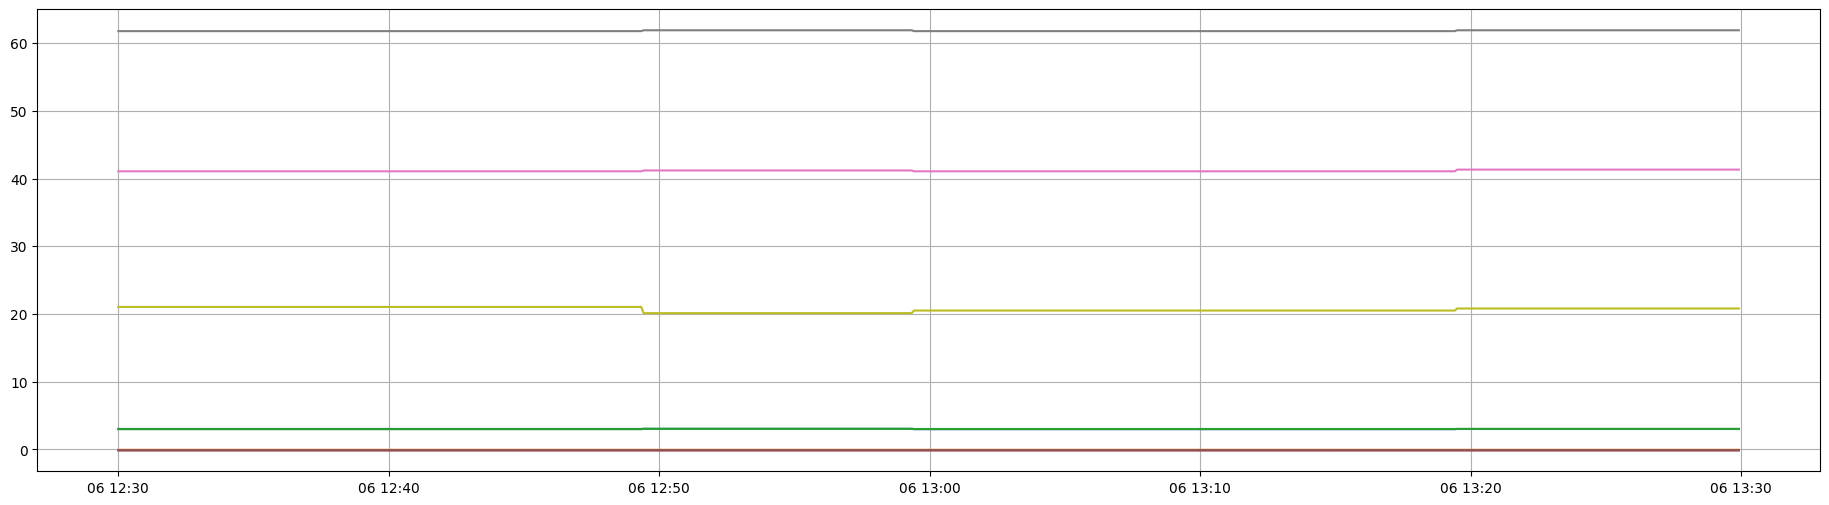

In [99]:
plt.figure(figsize=(23,6))
plt.plot(combined_resampled_df.iloc[:,:-2])
plt.grid()
plt.show()

## GROUP2_TURBINE_PRESS2

In [100]:
# CSV 파일 읽기
data = pd.read_csv('MODEL_DATA/GROUP2_TURBINE_PRESS2/GROUP2_TURBINE_PRESS2.csv')

# 타임스탬프 변환 및 인덱스 설정
data['Timestamp'] = pd.to_datetime(data['Timestamp'])  # 타임스탬프 변환
data.set_index('Timestamp', inplace=True)  # 인덱스 설정
data.sort_index(inplace=True)  # 인덱스 정렬

# 각 열에 대해 리샘플링
resampled_data = {}
for col in data.columns:
    resampled_data[col] = data[col].resample('5S').ffill().dropna()  # 리샘플링

# 리샘플링 결과를 데이터프레임으로 합치기
combined_resampled_df = pd.DataFrame(resampled_data)
combined_resampled_df = pd.concat([combined_resampled_df, GROUP1_MODE], axis=1).loc[start:end].iloc[:-1,:]

C:\Users\jhpark\AppData\Local\Temp\ipykernel_16396\1415565277.py:12: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  resampled_data[col] = data[col].resample('5S').ffill().dropna()  # 리샘플링


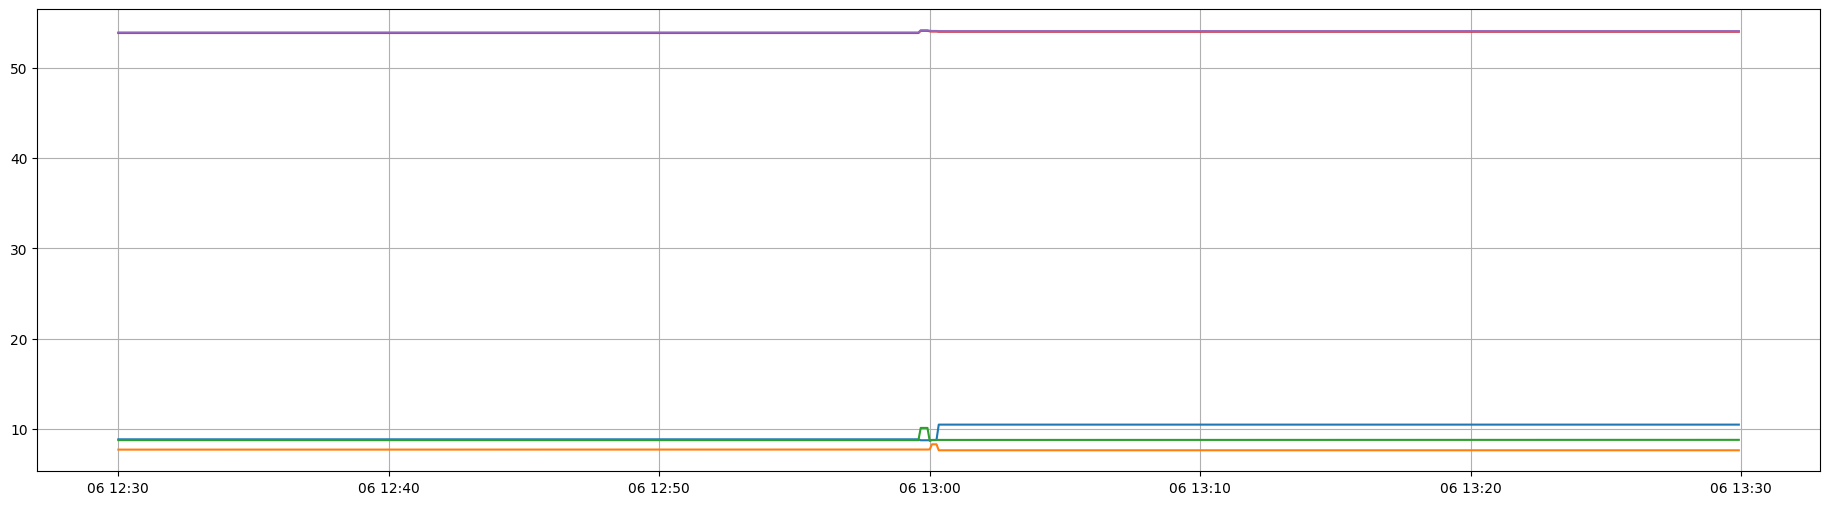

In [101]:
plt.figure(figsize=(23,6))
plt.plot(combined_resampled_df.iloc[:,:-2])
plt.grid()
plt.show()

## GROUP2_TURBINE_TEMP

In [102]:
# CSV 파일 읽기
data = pd.read_csv('MODEL_DATA/GROUP2_TURBINE_TEMP/GROUP2_TURBINE_TEMP.csv')

# 타임스탬프 변환 및 인덱스 설정
data['Timestamp'] = pd.to_datetime(data['Timestamp'])  # 타임스탬프 변환
data.set_index('Timestamp', inplace=True)  # 인덱스 설정
data.sort_index(inplace=True)  # 인덱스 정렬

# 각 열에 대해 리샘플링
resampled_data = {}
for col in data.columns:
    resampled_data[col] = data[col].resample('5S').ffill().dropna()  # 리샘플링

# 리샘플링 결과를 데이터프레임으로 합치기
combined_resampled_df = pd.DataFrame(resampled_data)
combined_resampled_df = pd.concat([combined_resampled_df, GROUP1_MODE], axis=1).loc[start:end].iloc[:-1,:]

C:\Users\jhpark\AppData\Local\Temp\ipykernel_16396\1767294482.py:12: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  resampled_data[col] = data[col].resample('5S').ffill().dropna()  # 리샘플링


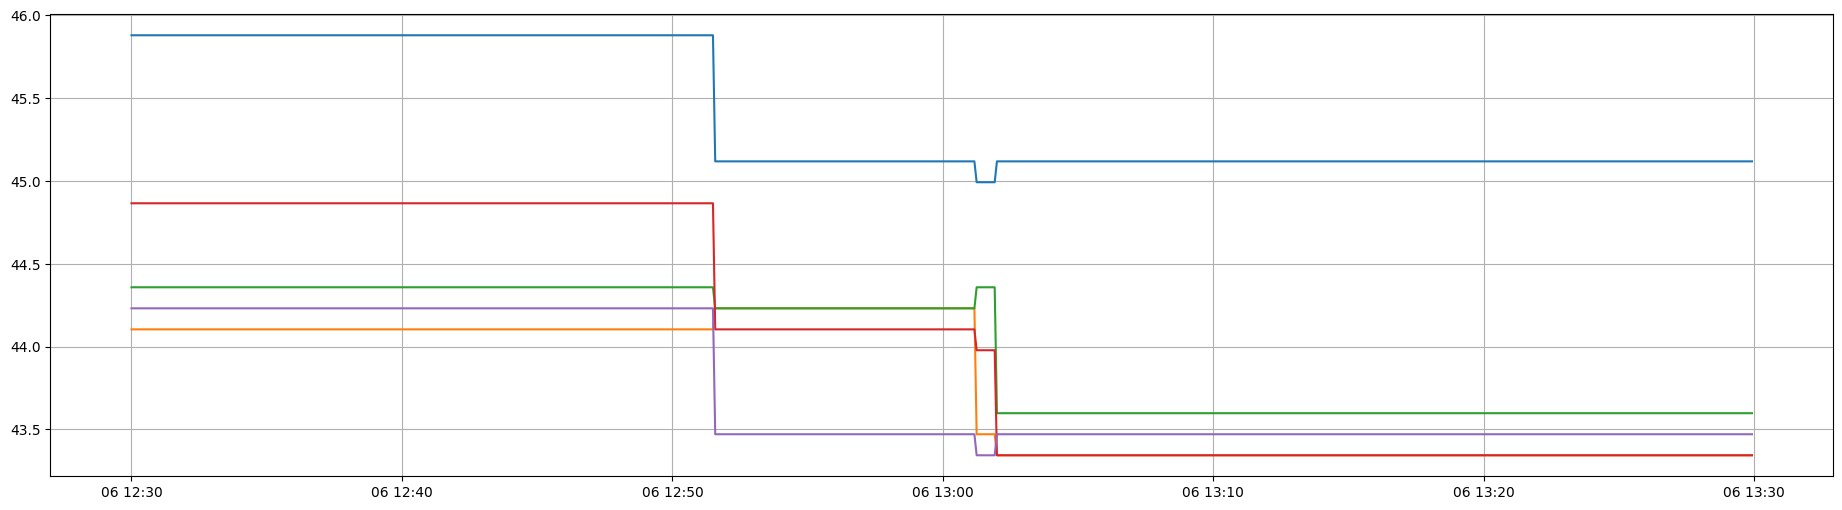

In [103]:
plt.figure(figsize=(23,6))
plt.plot(combined_resampled_df.iloc[:,:-2])
plt.grid()
plt.show()

## 데이터가 비정상일경우(이상데이터 모방)

In [111]:
test_data = pd.read_csv('cwp_press_testdata.csv', parse_dates=['Timestamp'], index_col='Timestamp')
test_data = test_data.loc['2024-01-05 08:26:55': '2024-01-05 09:26:54']
new_start_time = '2024-08-06 12:30:00'
new_end_time = '2024-08-06 13:29:55'
new_time_index = pd.date_range(start=new_start_time, periods=len(test_data), freq='5S')
test_data.index = new_time_index
test_data['Timestamp'] = pd.to_datetime(test_data.index) 
test_data.set_index('Timestamp', inplace=True)  # 인덱스 설정
test_data.sort_index(inplace=True)  # 인덱스 정렬
test_data

C:\Users\YOUPC\AppData\Local\Temp\ipykernel_9100\1021587125.py:5: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  new_time_index = pd.date_range(start=new_start_time, periods=len(test_data), freq='5S')


,3370-01-AI098,3370-01-AI099,3370-01-AI201,3370-01-AI202-1,3370-01-AI202,3370-01-EA5G5,3370-01-G-MODE,3370-01-P-MODE
Timestamp,,,,,,,,
2024-08-06 12:30:00,0.005,-0.003,9.251,8.997,9.019,0.784,0,1
2024-08-06 12:30:05,0.005,-0.003,9.251,8.997,9.019,0.784,0,1
2024-08-06 12:30:10,0.005,-0.003,9.251,8.997,9.019,0.784,0,1
2024-08-06 12:30:15,0.005,-0.003,9.251,8.997,9.019,0.784,0,1
2024-08-06 12:30:20,0.005,-0.003,9.251,8.997,9.019,0.784,0,1
...,...,...,...,...,...,...,...,...
2024-08-06 13:29:35,0.132,0.113,8.945,6.578,13.099,4.160,0,1
2024-08-06 13:29:40,0.140,0.114,8.965,6.578,13.123,4.156,0,1
2024-08-06 13:29:45,0.140,0.114,8.965,6.578,13.123,4.156,0,1


In [112]:
test_data.to_csv('VAE_GROUP1_CWP_PRESS.csv')

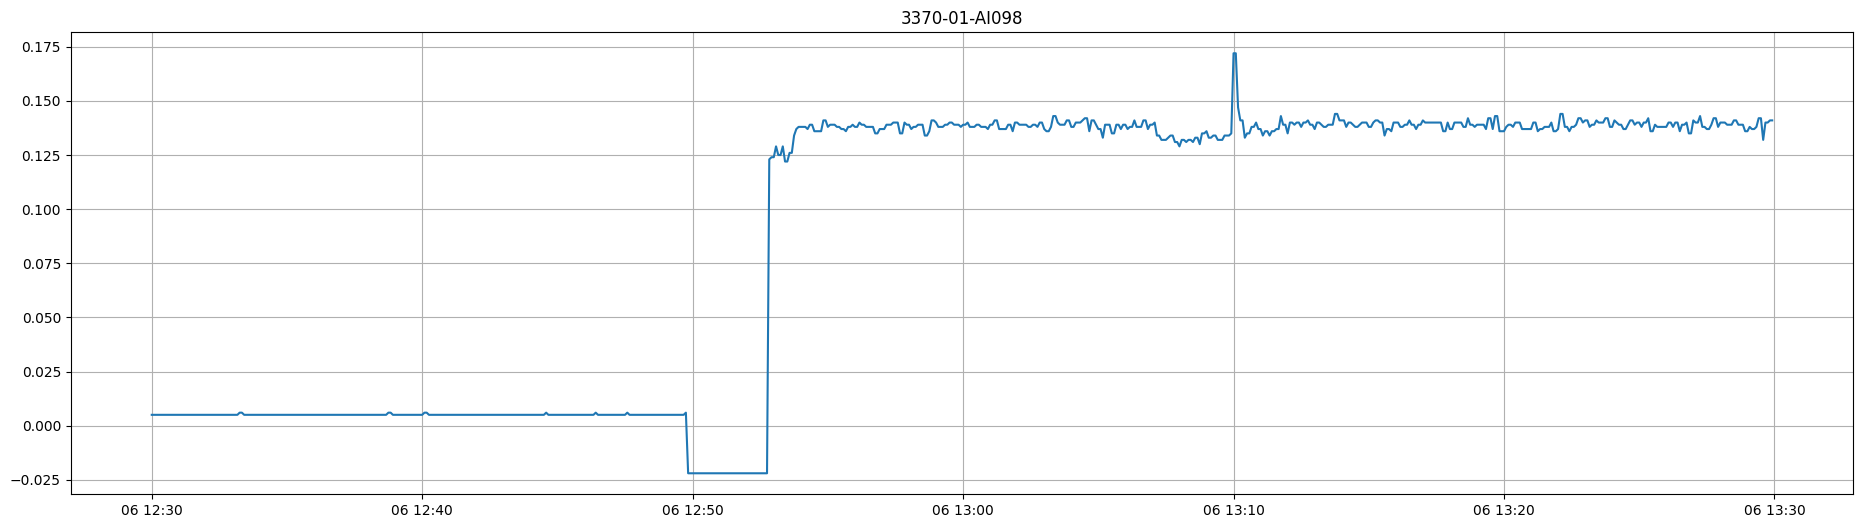

In [91]:
plt.figure(figsize=(23,6))
plt.plot(test_data['3370-01-AI098'])
plt.title('3370-01-AI098')
plt.grid()
plt.show()